In [1]:
import pandas as pd
from prophet import Prophet

In [2]:
# Dataset obtained from https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv
df = pd.read_csv('daily-min-temperatures.csv')
df

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


In [4]:
# ds has to be the date, y the unit we want to forecast
df = df.rename(columns={"Date": "ds", "Temp": "y"})

In [6]:
# Declare object and fit. Fit takes 5 seconds at most.
m = Prophet()
m.fit(df)
# Generate a future dataframe. This dataframe includes the original, so adding periods=720 it adds the same dates + two years
future = m.make_future_dataframe(periods=720)
future

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
0,1981-01-01
1,1981-01-02
2,1981-01-03
3,1981-01-04
4,1981-01-05
...,...
4365,1992-12-16
4366,1992-12-17
4367,1992-12-18
4368,1992-12-19


In [10]:
# Predict the dateframe using the trained model. yhat is the predicted value.
forecast = m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1981-01-01,11.866641,11.808087,18.641139,11.866641,11.866641,3.328284,3.328284,3.328284,0.010933,0.010933,0.010933,3.317351,3.317351,3.317351,0.0,0.0,0.0,15.194925
1,1981-01-02,11.864792,11.816907,18.812964,11.864792,11.864792,3.374920,3.374920,3.374920,-0.019854,-0.019854,-0.019854,3.394774,3.394774,3.394774,0.0,0.0,0.0,15.239711
2,1981-01-03,11.862942,11.620324,18.363617,11.862942,11.862942,3.411600,3.411600,3.411600,-0.060121,-0.060121,-0.060121,3.471720,3.471720,3.471720,0.0,0.0,0.0,15.274542
3,1981-01-04,11.861093,11.875567,18.697716,11.861093,11.861093,3.393868,3.393868,3.393868,-0.153079,-0.153079,-0.153079,3.546948,3.546948,3.546948,0.0,0.0,0.0,15.254961
4,1981-01-05,11.859243,12.101732,18.812676,11.859243,11.859243,3.599558,3.599558,3.599558,-0.019679,-0.019679,-0.019679,3.619236,3.619236,3.619236,0.0,0.0,0.0,15.458801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4365,1992-12-16,11.554066,11.172740,17.915924,11.304097,11.792148,2.829884,2.829884,2.829884,0.163322,0.163322,0.163322,2.666562,2.666562,2.666562,0.0,0.0,0.0,14.383950
4366,1992-12-17,11.554055,10.673345,17.687466,11.303711,11.792729,2.680693,2.680693,2.680693,0.010933,0.010933,0.010933,2.669760,2.669760,2.669760,0.0,0.0,0.0,14.234748
4367,1992-12-18,11.554044,10.493621,17.886455,11.303111,11.793428,2.655658,2.655658,2.655658,-0.019854,-0.019854,-0.019854,2.675512,2.675512,2.675512,0.0,0.0,0.0,14.209701
4368,1992-12-19,11.554032,10.844088,17.614295,11.302252,11.793918,2.624707,2.624707,2.624707,-0.060121,-0.060121,-0.060121,2.684828,2.684828,2.684828,0.0,0.0,0.0,14.178740


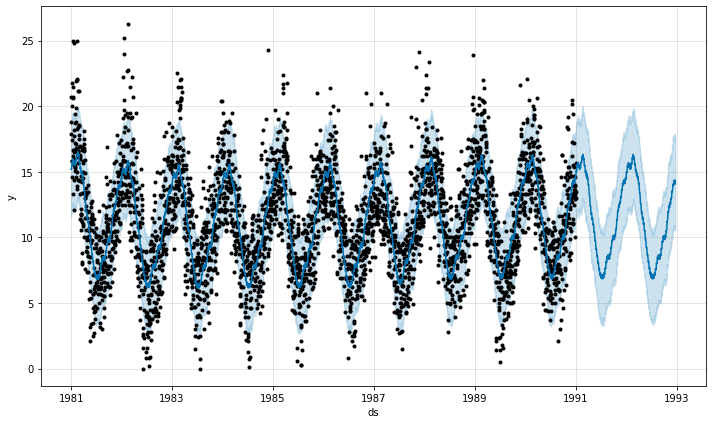

In [8]:
fig1 = m.plot(forecast)

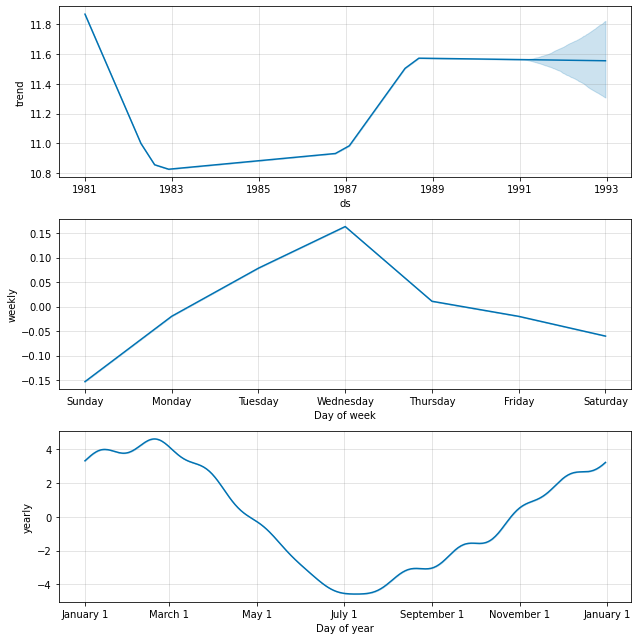

In [9]:
fig2 = m.plot_components(forecast)